# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#I ran a about 50 different combinations and this one seems differnt enough across most of the features. 
indices = [3, 24, 35] 

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,22647,9776,13792,2915,4482,5778
2,688,5491,11091,833,4239,436


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
Second customer: well above the mean in all of the categories except for Frozen which makes me guess that it is a small town grocery store. This guess is biased according with my experience of the country I am currently residing in which a small town grocery store serves products which are mainly not frozen which usually can be found in supermarkets, so frozen things can be found but it is not the main "dish"
First customer: Fairly close to the mean in all the categories but double the mean in the frozen category which make me suspect in some kind of a fast food establishment which have a lot of its prepared meals and vegetables on ice (also ice cream).
Third customer: well below the mean in fresh, Delicatessen and frozen. Fairly close to the mean in milk and above the mean in grocery and Detergents Paper. Makes me suspect of a small town shop that can be found in your local neighborhood, at least in my country (almost no vegetables and Delicatessen and frozen products and mainly for buying milk, cereals, toilet paper and bread).

I would like to emphasize that this is all a guess (biased by my own experience in the country I am living in) and it would be quite interesting to see what would be the results later on.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [19]:
print data.corr()
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size = 0.25, random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 42)
regressor = regressor.fit(X_train, y_train)


# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print "Score is:", score

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  
Score is: 0.681884008544


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I did some preliminary work of calculating the correlation matrix (can be found in the cell directly above this one using pearson),  using DataFrame.corr function and discovered that between Detergents_paper and Grocery exists a very high coefficient of about 0.92 and between Grocery and Milk of about 0.73. Since we were told to choose one feature to drop I thought it would be a good idea to choose Grocery as the feature we will attempt to predict with the other ones, as I suspect the information it brings to the table is mostly embedded in Milk and Detergents_Paper. 
Also, thinking about the meaning of the features it is kind of make sense since in a grocery store you will find dairy products and cleaning and paper products (and therefore the high correlation).
The reported prediction score was 0.68 which is relatively high and can lead to the conclusion to drop the feature altogether,  but maybe at this point I would have segmented the customer with and without this feature to see how and if the clusters change.
A priory, it seems it can be dropped :-)



### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

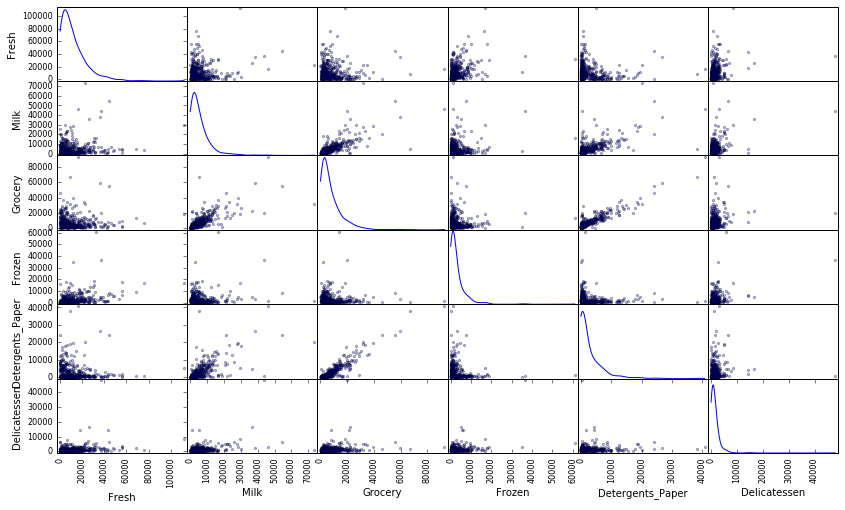

In [20]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

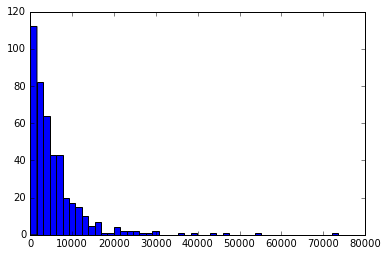

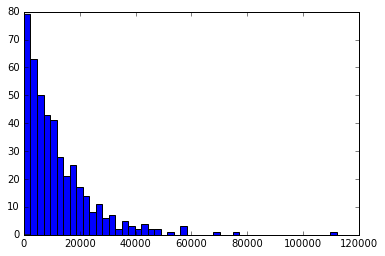

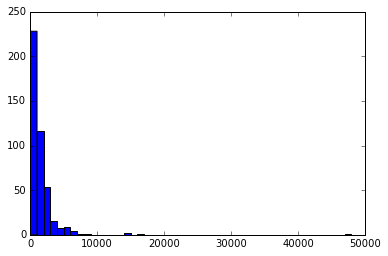

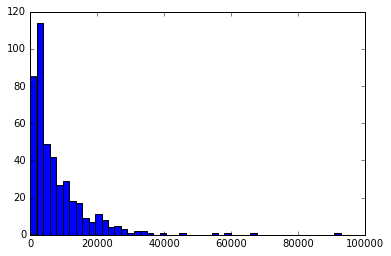

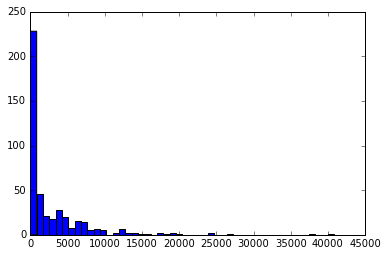

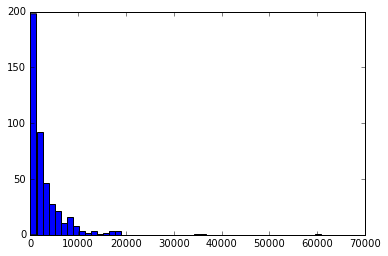

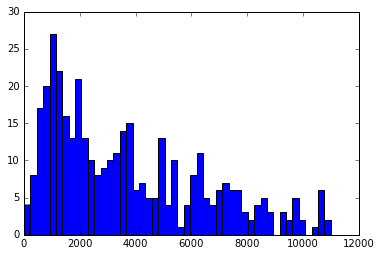

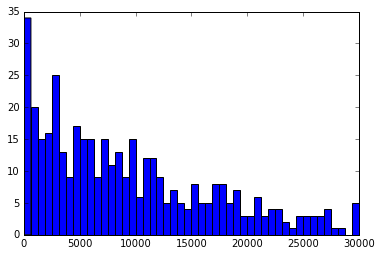

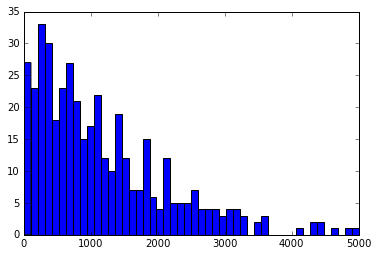

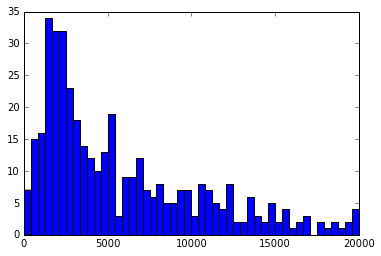

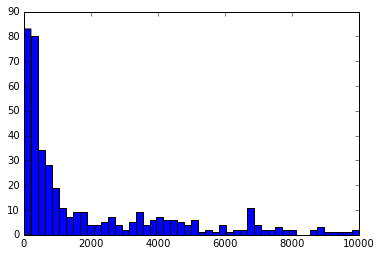

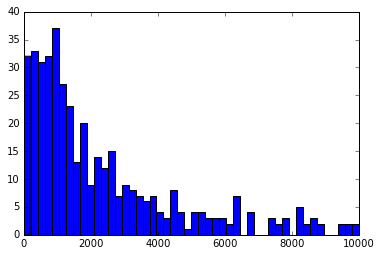

In [21]:
import matplotlib.pyplot as plt
#histogram plot of each feature
plt.hist(data['Milk'], bins = 48)
plt.show()
plt.hist(data['Fresh'], bins = 48)
plt.show()
plt.hist(data['Delicatessen'], bins = 48)
plt.show()
plt.hist(data['Grocery'], bins = 48)
plt.show()
plt.hist(data['Detergents_Paper'], bins = 48)
plt.show()
plt.hist(data['Frozen'], bins = 48)
plt.show()
#histogram plot of each feature within a range that is trying to capture the bulk of the data
plt.hist(data['Milk'], bins = 48, range = (0, 11000))
plt.show()
plt.hist(data['Fresh'], bins = 48, range = (0, 30000))
plt.show()
plt.hist(data['Delicatessen'], bins = 48, range = (0, 5000))
plt.show()
plt.hist(data['Grocery'], bins = 48, range = (0, 20000))
plt.show()
plt.hist(data['Detergents_Paper'], bins = 48, range = (0, 10000))
plt.show()
plt.hist(data['Frozen'], bins = 48, range = (0, 10000))
plt.show()




### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
There are pairs that exhibit quite a correlation and this visualization seems to confirm my suspicions about the lesser relevance of the feature I was trying to predict (Grocery). There is a linear relationship between Grocery and Detergentas_Paper and between Grocery and Milk, which is quite evident. Also, it seems Delicatessen values are concentrated below 1000 no matter what the value of the other features, so this makes me suspect that this feature, for example, can't be dropped because the information embedded in it is not to be found in other features (at least not to be found enough...)
Also, the histogram of the different features seems to be an exponential distribution. I find it logical since the data are logically truncated at 0 (we can't have negative values for spending amounts) and we fall of toward higher and higher values. So, maybe we should make the histograms only within the bulk of the data to see what really is going on. We still get non-normal data but just a decreasing (more smoothly) exponential dist. which makes me think that maybe a trasformation of the data is in order....
Now, let me emphasize that I examined the data visually and I have not used any statistical tool to actually fit a distribution, but since we are exploring the data at this stage, I think it is fine.




## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

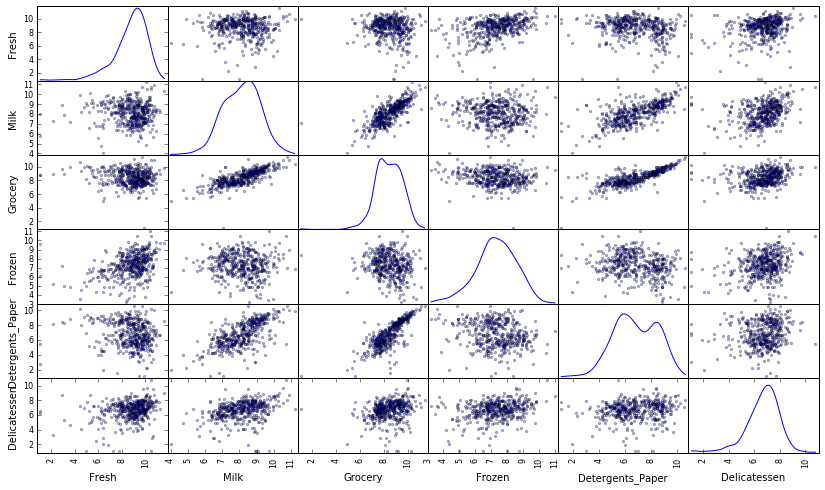

In [22]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [23]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,10.027783,9.187686,9.531844,7.977625,8.407825,8.661813
2,6.533789,8.610866,9.313889,6.725034,8.352083,6.077642


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [24]:
d = {} #this dictionary will hold the pairs row_index:count to see how many outliers are "shared" between more than 1 feature
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data[feature].quantile(q = 0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data[feature].quantile(q = 0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    #here we capture the dataframe for the current feature and calculating the number of occurences per outlier 
    df = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    for item in list(df.index):
        if item in d:
            d[item] += 1
        else:
            d[item] = 1
#here we tally the total of outliers and "shared" outliers (defined as rows that appear at least for two features)
s = [0,0]
for key in d:
    s[0] = s[0] + 1 #outliers
    if d[key] > 1: #"shared" between at least two features
        s[1] = s[1] + 1
print d
print s

# OPTIONAL: Select the indices for data points you wish to remove

outliers  = []
for key in d:
    if d[key] > 1:
        outliers.append(key)
print outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


{128: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 154: 3, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 65: 2, 66: 2, 203: 1, 325: 1, 289: 1, 75: 2, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1}
[42, 5]
[128, 154, 65, 66, 75]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
There are 5 data points who are considered outliers for more than one feature (4 of them for two features and one data point is considered an outlier for 3 features).  Since these 5 data points represent about 1.1% of the data set I think it is quite safe to remove them but I will not remove all the outliers that are due to one feature because we will approach 10% of the data. Also, it is important to note that we transformed the data so these outliers (the 5 data points I am going to remove from the data set) are really sticking out.
Now, the indices of these outliers are: 154(3 features), [128, 65, 66, 75]
154 is an outlier for the features Milk, Grocery and Delicatessen, 128 for fresh and Delicatessen, 65 for Fresh and Frozen, 66 for fresh and delicatessen and 75 for Grocery and Detergents_Paper. 
I did that because there is a high correlation between Grocery, Milk and Detergents_Paper so 75 and 154 make sense to me, and since we are left with other 3 additional data points, although I don't have enough domain expertise to necessarily make sense of them I still feel quite confident to remove them.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

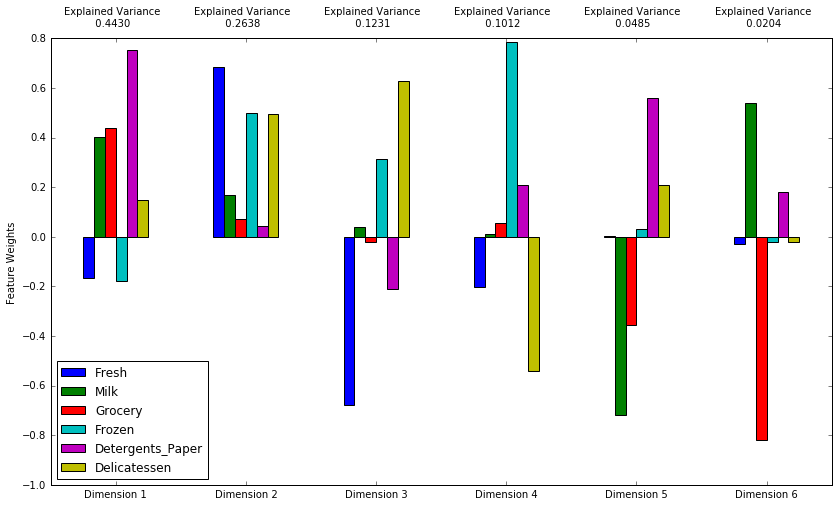

In [25]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca = pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
Since the explained variance indicates how much variance within the data is explained by that component (dimension) alone, the total variance explained by the first and second components is the sum of their individual explainedVariance values which gives 0.7068 or about 71% of the variance in the data. 
The same logic applied to the first 4 components gives 0.9311 or about 93% of the variance in the data.
The features within the first dimension which have significant weights are Detergents_Paper, Milk and Grocery. An increase in these 3 will cause an increase of the first dimension which therefore seems to capture what we have seen before of large grocery stores which buy these 3 product categories. Also, I think it is quite nice that these strong correlation are captured within the first dimension that have the highest value of explained variance.
The features within the second dimension that have significant weight are fresh, frozen and delicatessen. The dimension score increases with an increase in this group of products. 
In dimension 3 we have 2 significant features/products, fresh and delicatessen that influence the dimension in two opposite directions. An increase in delicatessen will increase the dimension score and the other way around with respect to Fresh which seems to indicate that these two products are inversely correlated. A customer that buys delicatessen will not buy much fresh products and vice versa.
In dimension 4 we have the same type of inverse correlation between frozen and delicatessen - an increase in frozen will increase the dimension while an increase in delicatessen will decrease the dimension score, fresh being the dominant term. So these two products are not bought together in large quantities, seems to be.
Since each component/dimension is a linear combination of the values of the features weighted by the weight of each feature, I tried to focus upon the significant terms. It seems these 4 dimension really capture the main variance and relationship in the data - the main correlation and groups of products that go together and the ones that do not go together, but especially the first two dimensions capture the two major groups of producs the "go togethor".



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [26]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.1553,1.4052,0.5422,0.4127,0.6865,-0.6409
1,2.0709,2.4853,0.2692,-0.4013,0.1917,-0.1027
2,2.1231,-1.9295,0.6099,0.6990,0.0618,-0.0670


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [27]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca = pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [28]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.1553,1.4052
1,2.0709,2.4853
2,2.1231,-1.9295


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-Means algorithm is a special case of GMM with equal covariance per component. That means that KMeans is faster (computationally speaking) and scalable. It is also quite simple and intuitive to understand. 
GMM on the other hand is a soft clustering algorithm which means the variances are different for different components and there is a probability weight of a data point being part of various clusters, so it is a great algorithm for situations with high degree of overlap between clusters, but it is slow and not scalable. Also, unlike KMeans, tt doesn't depend on the L2 norm (euclidian distance metric), but is based on the Expectation, i.e., the probability of the point belonging to a particular cluster. This makes K-means biased towards spherical clusters and is an advantage of GMM.
From what we have been exploring so far in the customers’ data it seems there is a degree of overlap between different groups of products that we hope will represent different customer segments and therefore I would pick up GMM. Although it is not as computationally efficient as KMeans, we have a relatively small data set so that it is not a major concern.
That is because KMeans hard assign a data point to one particular cluster on convergence and GMM soft assigns a point to clusters (so it give a probability of any point belonging to any centroid).


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [29]:
from sklearn import mixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

n_components_range = range(2, 7)
n_clusters = range(2, 7)
best_n_gmm = 1
#best_n_kmeans = 1
best_score = -2

#print "KMeans"
#for n in n_clusters:
#    clusterer = KMeans(n_clusters = n, random_state = 42)
#    clusterer.fit(reduced_data)
#    preds = clusterer.predict(reduced_data)
#    score = silhouette_score(X = reduced_data, labels = preds, random_state = 42)
#    if score > best_score:
#        best_n_kmeans = n
#        best_score = score
#print best_n_kmeans
#print best_score

#print "GMM"
#best_score = -2
for n_comp in n_components_range:
    clusterer = mixture.GMM(n_components = n_comp, random_state = 42)
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(X = reduced_data, labels = preds, random_state = 42)
    print "number of clusters:", n_comp, "Score:", score
    if score > best_score:
        best_n_gmm = n_comp
        best_score = score
#print best_n_gmm
#print best_score
    

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GMM(n_components = best_n_gmm, random_state = 42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)


# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(X = reduced_data, labels = preds, random_state = 42)

if score == best_score:
    print "best score:", score
else:
    print "DEBUG"


number of clusters: 2 Score: 0.411818864386
number of clusters: 3 Score: 0.373560747175
number of clusters: 4 Score: 0.331389093566
number of clusters: 5 Score: 0.280983407051
number of clusters: 6 Score: 0.277981985023
best score: 0.411818864386


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
What I have done was to run GMM and KMeans for comparison with cluster numbers ranging from 2 to 6 inclusive. In both cases the best number of clusters, based on the silhouette score was 2 clusters with a score 0f 0.41181. The different number of clusters tried along with their associated silhouette score is reported in the above cell.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

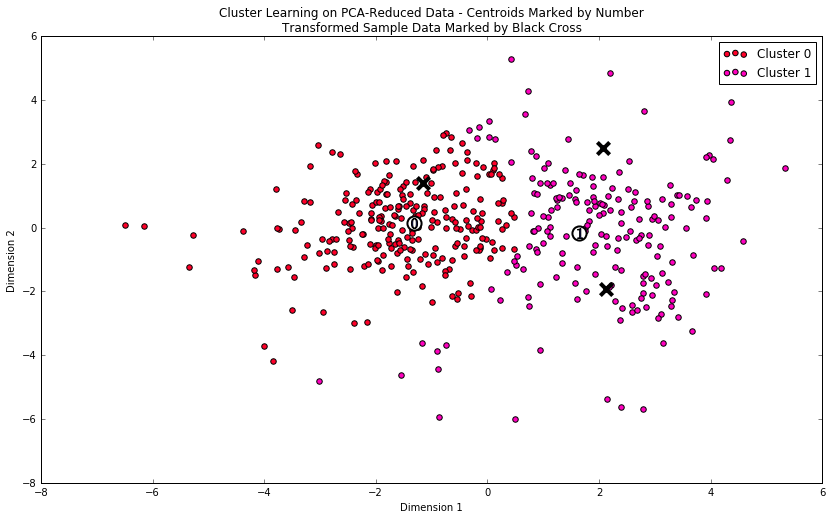

In [30]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [31]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
I have compared the results above with the median values for each product category and remembering the strong correlation between Grocery, Milk and Detergents_Paper we can see that segment_1 is probably a large grocery stores and small neighborhood stores (in my country they are quite abundant), for which the values of Grocery, Milk and Detergents_Paper are twice or more times their median values for the entire data set while the value for Fresh is half the median (which makes sense to me since vegetables and fruits are not the main products in a Grocery store) and frozen is at the median.
Segment_0 probably represents various establishments like farmer markets and supermarkets for which the values of Fresh and frozen should be higher with respect to grocery stores (segment_1) and delicatessen should be at the median, more or less.
It is important to note that these two clusters capture the entire universe of establishments represented in this data set and therefore there is noise on top of the signal coming from all other establishments but the bulk of the establishments, according with these clustering fall into one of these establishments type.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [32]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**
sample point 0 buy a lot less (with respect to the other two points) in the categories of Milk, Grocery and Detergents_Paper which should put it in cluster_0 since it is not a grocery store/small neighborhood store and will put the other two points in cluster_1.
I also think my sample points are a good representation of the noise I was talking about in the previous question. Point 0 has a lot less money spent on buying Fresh products with respect to sample point 1 but it is still not enough to put point 1 in the supermarket/farmers market cluster and in this particular case it is probably an anomaly of a very big establishment that sells everything :-)
I guess the strongest correlation in the data is the deciding factor to divide the points into the different clusters (Milk, Grocery and Detergents_Paper versus Frozen and/or Fresh with Delicatessen playing a minor role) - this is my general interpretation and understanding.



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
There are various ways to use the customer segments in order to determine which customers will have a positive reaction to the change in the delivery service. The reason is that probably not all customers will be affected equally since the segments represent different establishments’ types that will probably react differently to the new delivery scheme due to the nature of their business.
Segment_0 which is primarily about fresh and frozen products and especially due to the fresh category will react, I suspect, negatively to a delivery scheme that does not deliver every day due to the obvious correlation between freshness of the products and sales of these fresh products and these have to be delivered every day.
Segment_1 will probably react more positively to the change due to the categories of Detergents_Paper and Grocery and even Milk to some extent.
Therefore, I would a priori suspect that an A/B test can be devised only to Segment_1 customers (based on this observation above). 
Another way is to conduct two A/B tests within each segment to test the validity of the assumption of positive reaction from segment_1 customers and negative reaction from segement_0 customers (we may have surprises due to the variance within the two clusters) but ultimately the choice between these two ways, IMHO, will be boiled down to budget and time restrictions. Either way, we are utilizing the knowledge obtained from the customer segments.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Well, once we have labeled all the original data using our customer segments engineered feature we can a supervised learner on the new labeled data, using our engineered feature as the target variable.
Once we did that we can predict for the new customers, using our trained supervised learner, their label, that is their customer segment. 
I guess it is important to note that the quality of this supervised learning is directly related to the quality of the clustering algorithm we used because if the clusters are a poor representation of the data, it would lead to an engineered feature which poorly labels the data and therefore to a low quality supervised learner (once trained). It would be analogous, in my opinion, to a dirty/erroneous data set with respect to the labeling of the data.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

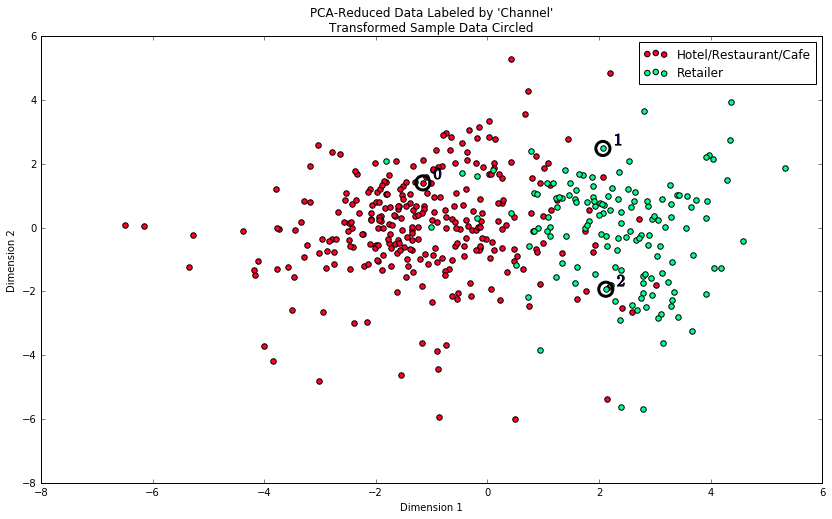

In [33]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
Well, the clustering algorithm (GMM) and number of clusters chosen (2) compare exceptionally good to the above distribution. I would even say that the clustering found two clusters that represent these two types of "Channel". 
I don't think the customer segments we found can be purely associated with 'Retailers' and 'Hotels/Restaurants/Cafes', that is, Cluster_0 corresponds mainly to Hotels/Restaurants/Cafes and cluster_1 to Retailers but not with 100% purity which makes sense but very high purity. The way to check that is to compare all the engineered labeling (cluster 0 or cluster 1) to the 'labeling' using Hotels/Restaurants/Cafes and Retailers to get a "purity" score. 
By examining the data from the two PCA visualization it seems that this "purity" score, which I have just invented :-), is very high, which indicates that this hidden variable is responsible to the structure of the data since the expenditures in the different categories are derived based on it.
These classifications are consistent with our previous definition to an extent but not as I thought initially. It now explains the high Fresh expenditure for Hotels/Restaurants/Cafes (I thought about farmer markets, for example) and the relatively low Grocery expenditure with respect to Retailers, but it won't change the conclusions with respect to the testing and a priory ideas we had about the reaction to the new delivery scheme.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.